## --> Decision Tree Nedir:

Decision Tree, yani Karar Ağaçları, verileri dallara ayırarak sınıflandırma veya regresyon yapan bir algoritmadır. Ağaç yapısında her **düğüm (node)** bir özelliği test eder, her **dal (branch)** bir karar sonucu oluşur ve yaprak düğümler sonuçları (sınıf) temsil eder.

### Karar Ağaçlarının Çalışma Prensibi:
Karar ağaçları, veriyi her adımda belirli bir özelliğe göre böler ve bu bölmeler sonucunda en doğru tahmini yapacak yaprak düğümlere ulaşmaya çalışır. Her bölme, genellikle verinin en iyi şekilde ayrılmasını sağlayacak gini impurity, entropy veya mean squared error (MSE) gibi bir ölçüte göre yapılır.

Root Node (Kök Düğüm): Karar ağacının başlangıcıdır ve tüm veri setini temsil eder.

Internal Nodes (İç Düğümler): Verinin belirli bir özelliğine göre yapılan testler ve bölme noktalarını temsil eder.

Leaf Nodes (Yaprak Düğümler): Karar ağacının son noktalarıdır ve sonuçları (sınıf etiketleri veya sürekli değerler) içerir.



#### Avantajları:
- Anlaşılması ve yorumlanması kolaydır.
- Hem sayısal hem de kategorik verilerle çalışabilir.
- Görselleştirilebilir.

#### Dezavantajları:
- Aşırı öğrenmeye (overfitting) yatkındır.
- Küçük veri değişiklikleri ağaç yapısını ciddi değiştirebilir.

--------------------------------------------------------------------------------------------
## --> Random Forest Nedir:

Random Forest, birçok karar ağacının bir araya gelmesiyle oluşan bir topluluk (ensemble) yöntemidir. Her ağaç farklı veri ve özellik altkümesi ile eğitilir ve son karar çoğunluk oylaması ile alınır.

### Random Forest Nasıl Çalışır?
Veri Bölme (Bootstrap Sampling):

Eğitim verisi üzerinde rastgele örnekler seçilir (örneğin, 1000 örnekten 800'ü rastgele seçilir ve her ağacın eğitim verisi farklı olur). Bu işlem, bootstrap sampling olarak bilinir.

Ağaçların Eğitilmesi:

Her karar ağacı bu rastgele seçilen verilerle eğitilir. Aynı zamanda, her karar ağacındaki özelliklerin seçimi de rastgele yapılır (özelliklerin bir alt kümesi seçilir). Bu, her ağacın farklı özelliklere odaklanmasını sağlar.

Sonuçların Birleştirilmesi:

Model eğitildikten sonra her ağaç, test verisine göre bir tahminde bulunur. Sınıflandırma problemlerinde her ağaç, bir sınıf etiketine karar verir ve oylama (majority voting) yapılır. Regresyon problemlerinde ise her ağaç bir sayısal değer tahmin eder ve sonuçlar ortalama alınarak birleştirilir.

Çeşitli Ağaçlar:

Bu süreç, modelin birden fazla karar ağacı kullanarak tahminler yapmasını sağlar. Farklı ağaçlar farklı kararlar vereceğinden, modelin genel doğruluğu daha yüksek olacaktır.
#### Avantajları:
- Aşırı öğrenmeye karşı dayanıklıdır.
- Genelde daha yüksek doğruluk verir.
- Gürültülü verilerde daha iyi performans gösterir.

#### Dezavantajları:
- Daha yavaştır, daha fazla işlem gücü gerektirir.
- Yorumlanması daha zordur.



In [4]:
import sklearn.tree as tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

Model doğruluğu: 100.00%


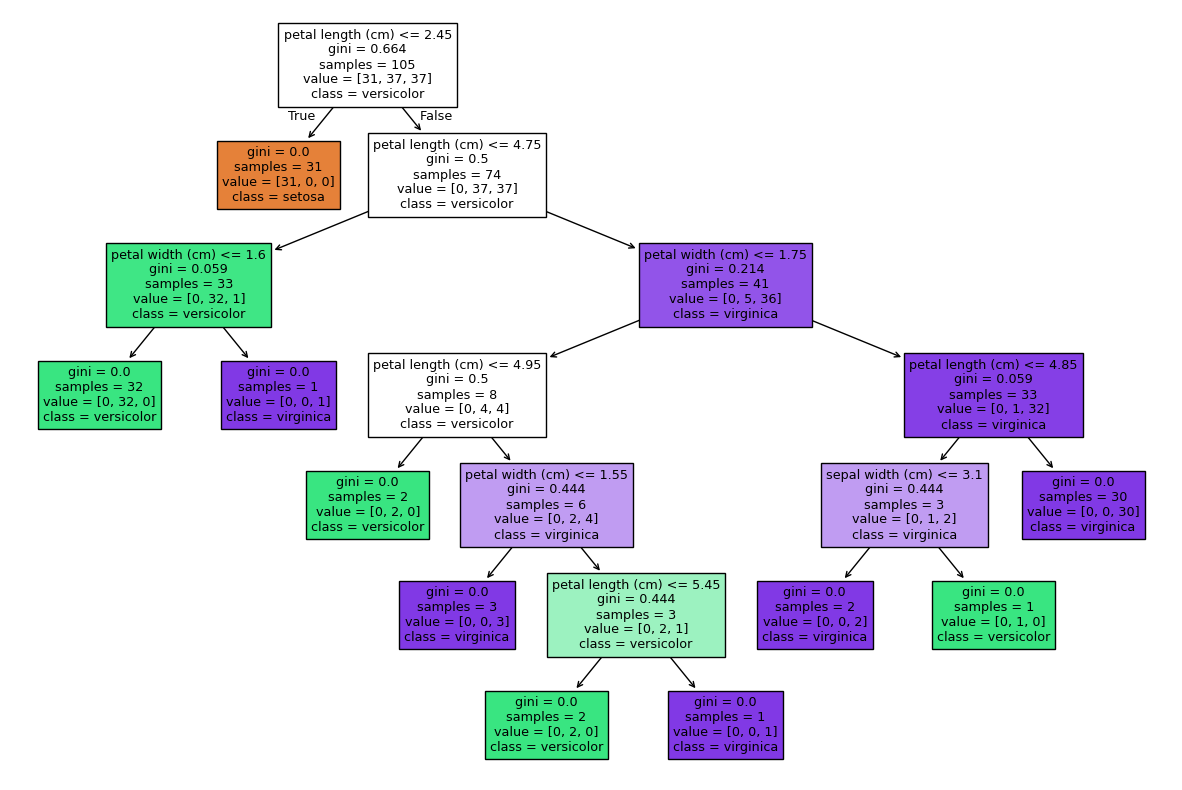

In [8]:
# Veriyi yükleme kısmı (iris veri seti)
data = load_iris()
X = data.data
y = data.target

# Veriyi eğitim ve test setlerine böler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Karar ağacı modelini oluşturur
model = DecisionTreeClassifier(random_state=42)

# Modeli eğitim verisiyle eğitir
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapar
y_pred = model.predict(X_test)

# Sonuçları değerlendirir
accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu: {accuracy * 100:.2f}%")

# Karar ağacının görselleştirilmesi bu kod ile
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Karar ağacını görselleştirme kısmı
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini oluşturur ve eğitir
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin yap ve doğruluğu yazdırır
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Doğruluk:", accuracy_score(y_test, y_pred_rf))

Random Forest Doğruluk: 1.0
